Querying:


100%|██████████| 6/6 [00:00<00:00, 38.76it/s]


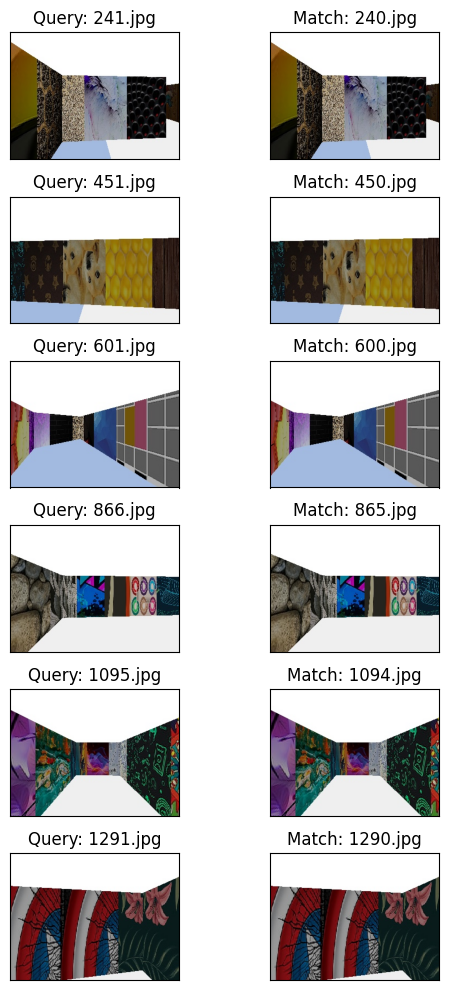

In [87]:
import cv2
import numpy as np
import os
import pickle
from tqdm import tqdm

from sklearn.cluster import KMeans
from sklearn.neighbors import BallTree
import matplotlib.pyplot as plt
import VPR

codebook_path = r'./data/images_codebook/'
database_path = r'./data/images/'
query_path = r'./data/query_images/'
position_path = r'./data/positions.txt'
SIFT_extractor = cv2.SIFT_create()


# codebook = VPR.create_codebook(SIFT_extractor, database_path)
codebook = pickle.load(open("codebook.pkl", "rb"))
# VPR.create_tree(SIFT_extractor, codebook, database_path)
[tree, database_name] = pickle.load(open('tree.pkl', 'rb'))
indeces, value_list = VPR.find_target(SIFT_extractor, query_path, codebook, tree, database_name)
VPR.plot_results(query_path, value_list, database_path)

In [77]:
value_list[3] = ""
print(value_list)

['240.jpg', '', '600.jpg', '', '1094.jpg', '1290.jpg']


In [172]:
def match_images(query_path, value_list, database_path, position_path, indeces):
    positions = np.loadtxt(position_path, delimiter=',')
    recovered_imgs = []
    query_imgs = []
    query_paths = os.listdir(query_path)
    query_paths = sorted(query_paths, key=lambda x: int(x.split('.')[0]))
    indeces_filtered = []

    query_paths_filtered = []
    value_list_filtered = []
    for i in range(len(query_paths)):
        if value_list[i] == "" or value_list[i] is None:
            print("skipped")
            continue
        else:
            img = cv2.imread(os.path.join(query_path, query_paths[i]))
            query_imgs.append(img[:,:,::-1])
            recovered_imgs.append(cv2.imread(os.path.join(database_path, value_list[i]))[:,:,::-1])
            query_paths_filtered.append(query_paths[i])
            value_list_filtered.append(value_list[i])
            indeces_filtered.append(indeces[i][0])
            
    num_samples = len(recovered_imgs)

    fig, axs = plt.subplots(num_samples,2,figsize=(6,10))

    for idx,(i,j) in enumerate(zip(query_imgs,recovered_imgs)):
        #Plot
        axs[idx,0].imshow(i)
        axs[idx,1].imshow(j)
        
        # #Set title to ref img names
        axs[idx,0].title.set_text("Query: " + query_paths_filtered[idx])
        axs[idx,1].title.set_text("Match: " + value_list_filtered[idx])
        # x = positions[indeces_filtered[idx]][0][0]
        # y = positions[indeces_filtered[idx]][0][1]
        # z = positions[indeces_filtered[idx]][0][2]
        # print(x, y, z)
        
        # #Tidy things up
        axs[idx,0].set_yticks([])
        axs[idx,0].set_xticks([])
        axs[idx,1].set_yticks([])
        axs[idx,1].set_xticks([])
        
    fig.tight_layout()
    # plt.savefig('results.jpg')
    plt.show()
    return positions, np.asarray(indeces_filtered).flatten()

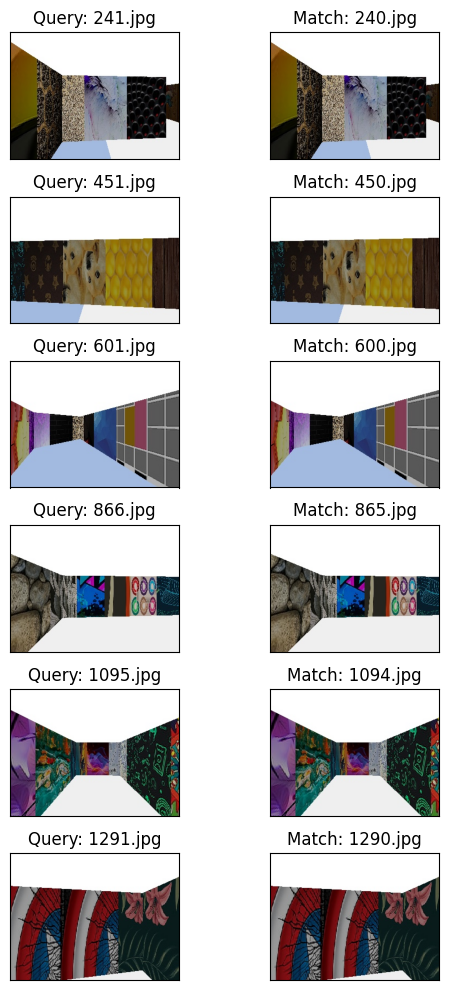

In [188]:
positions, goal_indeces = match_images(query_path, value_list, database_path, position_path, indeces)

In [209]:
def plot_positions(positions, goal_indeces):
    plt.figure(figsize=(6, 6))
    plt.plot(positions[:, 0], positions[:, 1], 'b')
    plt.scatter(positions[goal_indeces, 0], positions[goal_indeces, 1], c='r')
    count = 0
    for idx in goal_indeces:
        plt.annotate(str(count), (positions[idx][0]+1, positions[idx][1]+1))
        print(idx)
        count += 1
    plt.show()

240
450
600
865
1094
1290


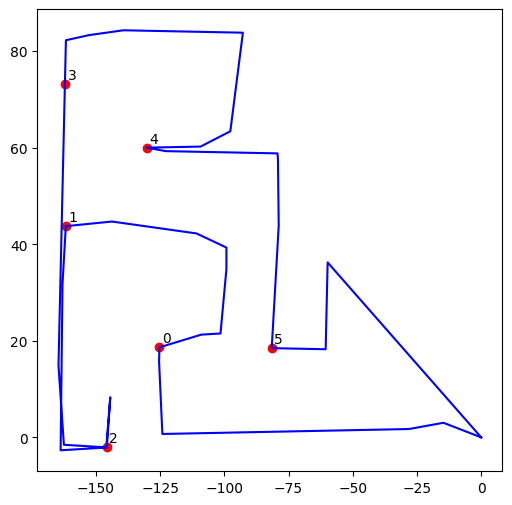

In [210]:
plot_positions(positions, goal_indeces)